Student Name: Ruochen Zhao

In [65]:
# Install and import packages for later analysis
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from scipy.stats import shapiro, levene
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
!pip install pingouin
import pingouin as pg
from math import sqrt
from statsmodels.stats.power import TTestIndPower
import statsmodels.stats.power as smp


## Part 1: Exploratory Data Analysis

In [66]:
# Load dataset into dataframe format
df = pd.read_csv("INF2178_A4_data.csv")
df.head()

,Unnamed: 0,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444


In [67]:
# Drop the Unnamed column
df = df.drop(columns=['Unnamed: 0'])
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444


In [68]:
# Get the number of rows and columns
num_rows, num_columns = df.shape

print(f"The dataset contains {num_rows} rows and {num_columns} columns.")

The dataset contains 294 rows and 15 columns.


In [69]:
# Check NaN values in the data set
nan_counts = df.isna().sum()

print(nan_counts)

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           15
MMSE           1
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64


In [70]:
# Drop NaN values for rows where the value for MMSE column is NaN, as this is the value we want to study
df = df.dropna(subset=["MMSE"])

In [71]:
# Check for column types
column_types = df.dtypes
print(column_types)

Subject ID     object
MRI ID         object
Group          object
Visit           int64
MR Delay        int64
M/F            object
Hand           object
Age             int64
EDUC            int64
SES           float64
MMSE          float64
CDR           float64
eTIV            int64
nWBV          float64
ASF           float64
dtype: object


In [72]:
print(pd.unique(df['Group']))

['Nondemented' 'Demented' 'Converted']


In [73]:
print(pd.unique(df['Visit']))

[1 2]


In [74]:
# Filter the data to include only individuals with both Visit 1 and Visit 2
filtered_data = df.groupby('Subject ID').filter(lambda x: set(x['Visit']) == {1, 2})
unique_subjects_after_filtering = filtered_data['Subject ID'].nunique()

print(f"Number of unique subjects after filtering: {unique_subjects_after_filtering}")

Number of unique subjects after filtering: 143


In [75]:
# Summary statistics
print(filtered_data.describe())

            Visit     MR Delay         Age        EDUC         SES  \
count  286.000000   286.000000  286.000000  286.000000  274.000000   
mean     1.500000   357.685315   76.437063   14.608392    2.489051   
std      0.500876   402.378340    7.653543    2.901990    1.129795   
min      1.000000     0.000000   60.000000    6.000000    1.000000   
25%      1.000000     0.000000   71.000000   12.000000    2.000000   
50%      1.500000    91.000000   76.000000   15.000000    2.000000   
75%      2.000000   673.000000   81.000000   16.000000    3.000000   
max      2.000000  1707.000000   98.000000   23.000000    5.000000   

             MMSE         CDR         eTIV        nWBV         ASF  
count  286.000000  286.000000   286.000000  286.000000  286.000000  
mean    27.223776    0.300699  1481.227273    0.731203    1.200986  
std      3.441582    0.382237   175.840440    0.037617    0.138250  
min     15.000000    0.000000  1106.000000    0.646000    0.876000  
25%     26.000000    0.0

In [ ]:
# Just for reference
# Histograms of Age distribution
#plt.figure(figsize=(18, 5))
#plt.subplot(1, 3, 1)
#sns.histplot(filtered_data['Age'], kde=True, color='skyblue')
#plt.title('Age Distribution')


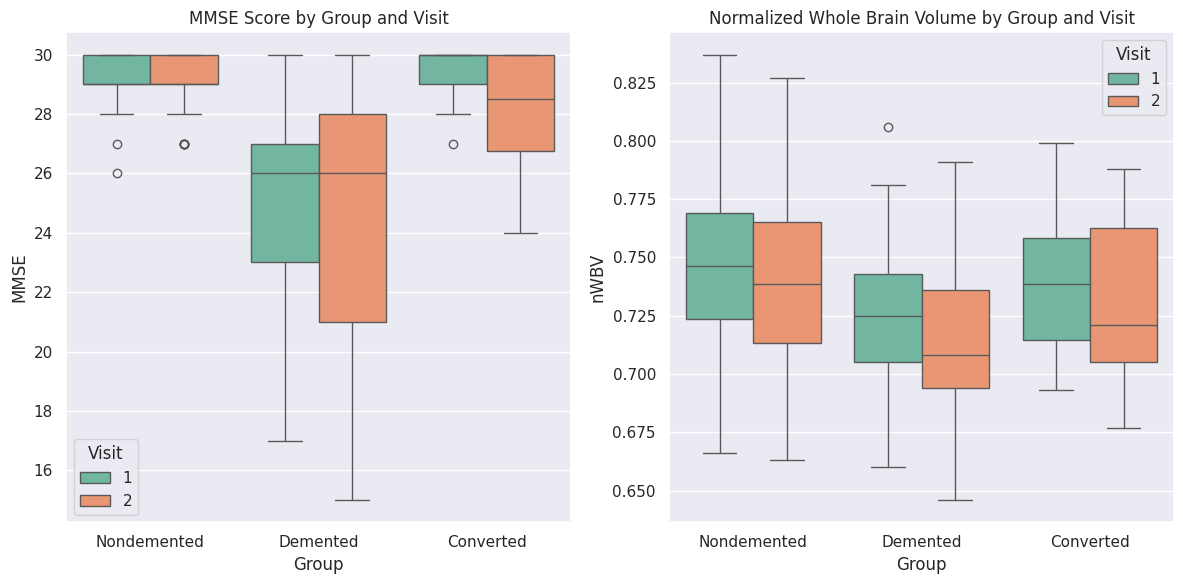

In [76]:
# Boxplots by Group

# Adjust the figsize width to accommodate two plots side by side
plt.figure(figsize=(12, 6))

# MMSE Score by Group and Visit
plt.subplot(1, 2, 1)
sns.boxplot(x='Group', y='MMSE', hue='Visit', data=filtered_data, palette="Set2")
plt.title('MMSE Score by Group and Visit')

# Normalized Whole Brain Volume by Group and Visit
plt.subplot(1, 2, 2)
sns.boxplot(x='Group', y='nWBV', hue='Visit', data=filtered_data, palette="Set2")
plt.title('Normalized Whole Brain Volume by Group and Visit')

# Adjust the layout so the plots are not overlapping and titles are visible
plt.tight_layout()

# Display the plot
plt.show()


In [78]:
# Just for reference
# Boxplot by visits

# Filter the dataset for subjects with the group 'Demented'
#demented_data = filtered_data[filtered_data['Group'] == 'Demented']

# Setting up the plot
#plt.figure(figsize=(10, 6))

# Generating the boxplot
#ax = sns.boxplot(x='Visit', y='nWBV', data=demented_data, color='#99c2a2')

# Overlaying the swarm plot
#ax = sns.swarmplot(x="Visit", y="nWBV", data=demented_data, color='#7d0013')

# Enhancing the plot with titles and labels
#plt.title('Distribution of Normalized Whole Brain Volume by Visit for Demented Group')
#plt.xlabel('Visit')
#plt.ylabel('nWBV Score')

# Display the plot
#plt.show()


## Research Question 1: How does the progression of nWBV differ among individuals with different cognitive statuses over two visits?

In [80]:
# Checking the unique values in the 'Group' column
unique_groups = filtered_data['Group'].unique()
print("Unique groups in the 'Group' column:", unique_groups)

Unique groups in the 'Group' column: ['Nondemented' 'Demented' 'Converted']


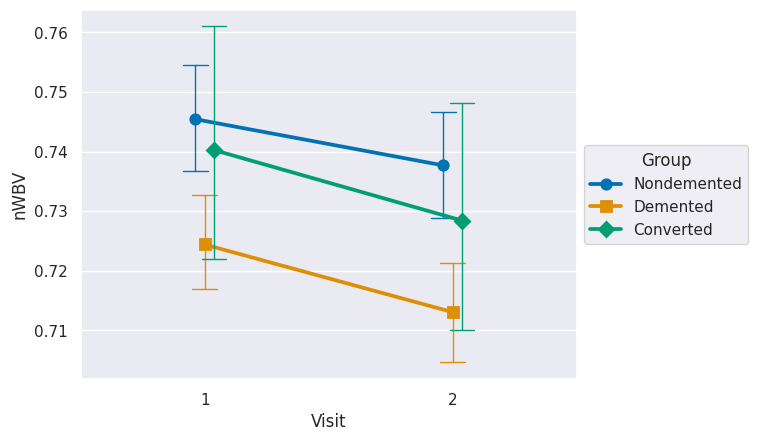

In [81]:
# From in-class notes by Professor Shion Guha
# Define markers for each group
markers = ['o', 's', 'D']

sns.set()
sns.pointplot(data=filtered_data, x='Visit', y='nWBV', hue='Group', dodge=True, markers=markers,
              capsize=.1, err_kws={'linewidth': 1}, palette='colorblind')

plt.legend(title='Group', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


In [82]:
filtered_data.groupby(['Visit', 'Group'])['nWBV'].agg(['mean', 'std']).round(2)

mean   std
Visit Group                  
1     Converted    0.74  0.04
      Demented     0.72  0.03
      Nondemented  0.75  0.04
2     Converted    0.73  0.04
      Demented     0.71  0.03
      Nondemented  0.74  0.04

In [83]:
# Compute the two-way mixed-design ANOVA
aov = pg.mixed_anova(dv='nWBV', within='Visit', between='Group', subject='Subject ID', data=filtered_data)
# Pretty printing of ANOVA summary
pg.print_table(aov)


ANOVA SUMMARY

Source          SS    DF1    DF2     MS       F    p-unc    np2      eps
-----------  -----  -----  -----  -----  ------  -------  -----  -------
Group        0.034      2    140  0.017   6.800    0.002  0.089  nan
Visit        0.007      1    140  0.007  97.523    0.000  0.411    1.000
Interaction  0.000      2    140  0.000   1.786    0.171  0.025  nan



In [84]:
posthocs = pg.pairwise_ttests(dv='nWBV', within='Visit', between='Group',
                              subject='Subject ID', data=filtered_data)
pg.print_table(posthocs)


POST HOC TESTS

Contrast       Visit    A          B            Paired    Parametric         T      dof  alternative      p-unc                 BF10    hedges
-------------  -------  ---------  -----------  --------  ------------  ------  -------  -------------  -------  -------------------  --------
Visit          -        1          2            True      True           9.821  142.000  two-sided        0.000  505100000000000.000     0.257
Group          -        Converted  Demented     False     True           1.426   14.781  two-sided        0.175                0.688     0.476
Group          -        Converted  Nondemented  False     True          -0.648   15.832  two-sided        0.527                0.361    -0.188
Group          -        Demented   Nondemented  False     True          -3.718  128.746  two-sided        0.000               81.736    -0.639
Visit * Group  1        Converted  Demented     False     True           1.454   14.748  two-sided        0.167              

/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


In [85]:
res = pg.rm_anova(dv='nWBV', within='Visit', subject='Subject ID', data=filtered_data, detailed=True)
res

,Source,SS,DF,MS,F,p-unc,ng2,eps
0,Visit,0.006639,1,0.006639,96.454874,1.081112e-17,0.016463,1.0
1,Error,0.009775,142,0.000069,NaN,NaN,NaN,NaN


In [86]:
#post hoc tests: paired t-tests with FDR-BH corrections
post_hocs = pg.pairwise_ttests(dv='nWBV', within='Visit', subject='Subject ID', padjust='fdr_bh', data=filtered_data)
post_hocs

/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,Visit,1,2,True,True,9.821144,142.0,two-sided,1.081112e-17,5.051e+14,0.257169


In [87]:
#checking assumptions
#mauchly's test of sphericity
pg.sphericity(data=filtered_data, dv='nWBV', subject='Subject ID', within='Visit')[-1]

1.0

In [88]:
#test of normality
pg.normality(data=filtered_data, dv='nWBV', group='Visit')

,W,pval,normal
Visit,,,
1,0.989625,0.369447,True
2,0.989271,0.341162,True


In [89]:
# Levene's test for homogeneity
pg.homoscedasticity(data=filtered_data, dv='nWBV', group='Visit')

,W,pval,equal_var
levene,0.35614,0.551133,True


## Research Question 2: How does cognitive scores, as measured by MMSE, change over time in individuals, and does this change differ by cognitive status group

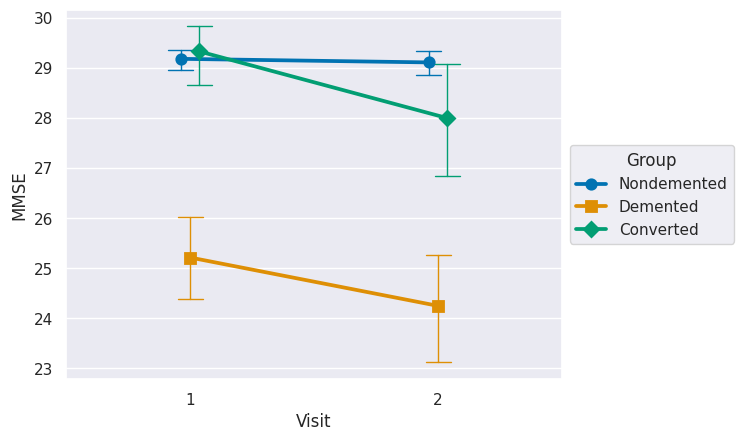

In [90]:
# From in-class notes by Professor Shion Guha
# Define markers for each group
markers = ['o', 's', 'D']

# Plot the figure
sns.set()
sns.pointplot(data=filtered_data, x='Visit', y='MMSE', hue='Group', dodge=True, markers=markers,
              capsize=.1, err_kws={'linewidth': 1}, palette='colorblind')

plt.legend(title='Group', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [91]:
filtered_data.groupby(['Visit', 'Group'])['MMSE'].agg(['mean', 'std']).round(2)

mean   std
Visit Group                   
1     Converted    29.33  0.98
      Demented     25.21  3.35
      Nondemented  29.19  0.86
2     Converted    28.00  2.09
      Demented     24.25  4.40
      Nondemented  29.11  0.96

In [92]:
# Compute the two-way mixed-design ANOVA
aov = pg.mixed_anova(dv='MMSE', within='Visit', between='Group', subject='Subject ID', data=filtered_data)
# Pretty printing of ANOVA summary
pg.print_table(aov)


ANOVA SUMMARY

Source             SS    DF1    DF2       MS       F    p-unc    np2      eps
-----------  --------  -----  -----  -------  ------  -------  -----  -------
Group        1328.421      2    140  664.211  56.212    0.000  0.445  nan
Visit          22.378      1    140   22.378   8.859    0.003  0.060    1.000
Interaction    17.000      2    140    8.500   3.365    0.037  0.046  nan



In [93]:
posthocs = pg.pairwise_ttests(dv='MMSE', within='Visit', between='Group',
                              subject='Subject ID', data=filtered_data)
pg.print_table(posthocs)


POST HOC TESTS

Contrast       Visit    A          B            Paired    Parametric         T      dof  alternative      p-unc                BF10    hedges
-------------  -------  ---------  -----------  --------  ------------  ------  -------  -------------  -------  ------------------  --------
Visit          -        1          2            True      True           2.928  142.000  two-sided        0.004               5.530     0.162
Group          -        Converted  Demented     False     True           6.739   51.065  two-sided        0.000         2036000.000     1.167
Group          -        Converted  Nondemented  False     True          -1.303   12.315  two-sided        0.216               0.599    -0.584
Group          -        Demented   Nondemented  False     True          -9.449   64.318  two-sided        0.000  22070000000000.000    -1.754
Visit * Group  1        Converted  Demented     False     True           8.012   60.516  two-sided        0.000       318700000.000

/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


In [94]:
res = pg.rm_anova(dv='MMSE', within='Visit', subject='Subject ID', data=filtered_data, detailed=True)
res

,Source,SS,DF,MS,F,p-unc,ng2,eps
0,Visit,22.377622,1,22.377622,8.573747,0.003974,0.006629,1.0
1,Error,370.622378,142,2.610017,NaN,NaN,NaN,NaN


In [95]:
#post hoc tests: paired t-tests with FDR-BH corrections
post_hocs = pg.pairwise_ttests(dv='MMSE', within='Visit', subject='Subject ID', padjust='fdr_bh', data=filtered_data)
post_hocs

/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,Visit,1,2,True,True,2.928096,142.0,two-sided,0.003974,5.53,0.162378


In [96]:
#checking assumptions
#mauchly's test of spericity
pg.sphericity(data=filtered_data, dv='MMSE', subject='Subject ID', within='Visit')[-1]

1.0

In [97]:
#test of normality
pg.normality(data=filtered_data, dv='MMSE', group='Visit')

,W,pval,normal
Visit,,,
1,0.792239,5.775201e-13,False
2,0.760728,5.430693e-14,False


In [98]:
# Levene's test for homogeneity
pg.homoscedasticity(data=filtered_data, dv='MMSE', group='Visit')

,W,pval,equal_var
levene,1.726974,0.189858,True


## Statistical power analysis plot for t-tests example

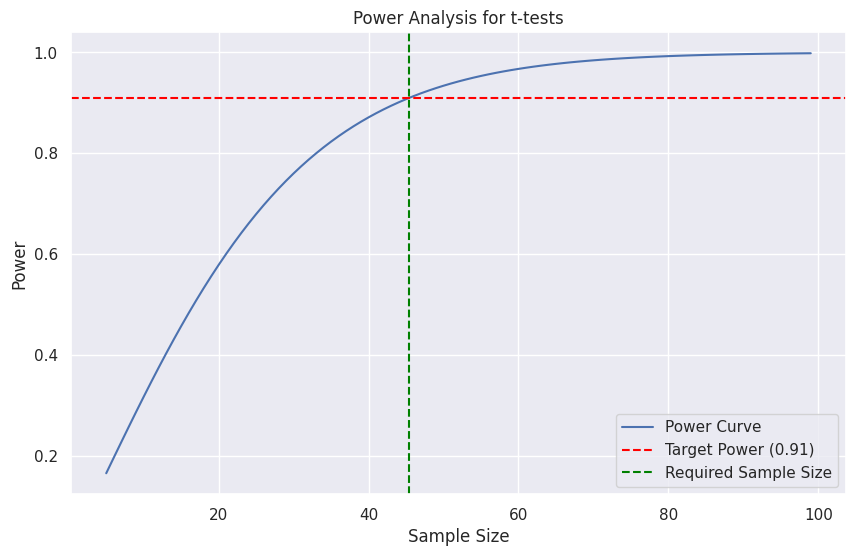

In [99]:
# Parameters for the power analysis
effect_size = 0.7  # Cohen's d
alpha = 0.05       # Significance level
power = 0.91       # Desired power

# Create an instance of TTestIndPower
power_analysis = TTestIndPower()

# Calculate the sample size
sample_size = power_analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha, ratio=1.0)

# Create a range of sample sizes for the x-axis of the plot
sample_sizes = np.arange(5, 100)

# Calculate the power for each sample size using a fixed effect size and alpha
powers = power_analysis.solve_power(effect_size=effect_size, nobs1=sample_sizes, alpha=alpha, power=None, ratio=1.0)

# Plotting the power analysis plot
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, powers, label='Power Curve')
plt.axhline(y=power, color='red', linestyle='--', label='Target Power (0.91)')
plt.axvline(x=sample_size, color='green', linestyle='--', label='Required Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('Power')
plt.title('Power Analysis for t-tests')
plt.legend()
plt.grid(True)
plt.show()

## Calculate sample size for a theoretical eexperiment with power = 0.91, alpha = 0.05, and effect size = 0.7

In [100]:
# Reference code from Professor Shion Guha

power_analysis = smp.TTestIndPower()
sample_size = power_analysis.solve_power(effect_size=0.7, power=0.91, alpha=0.05)
sample_size

45.45073088568012